##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Standalone Model Card Toolkit Demo

This "standalone" notebook demonstrates using the Model Card Toolkit without the TFX/MLMD context. To learn how to use Model Card Toolkit with TFX/MLMD, please check [MLMD Model Card Toolkit Demo](./MLMD_Model_Card_Toolkit_Demo.ipynb).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/responsible_ai/model_card_toolkit/examples/Standalone_Model_Card_Toolkit_Demo"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/model-card-toolkit/model_card_toolkit/documentation/examples/Standalone_Model_Card_Toolkit_Demo.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Objective

This notebook demonstrates how to generate a Model Card using the Model Card Toolkit in a Jupyter/Colab environment. You can learn more about model cards at https://modelcards.withgoogle.com/about. 

We are using a Keras model in this demo. But the logic below also applies to other ML frameworks in general.



## Setup
We first need to a) install and import the necessary packages, and b) download the data.

### Upgrade to Pip and install the Model Card Toolkit

In [ ]:
!pip install --upgrade pip==21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install -q model-card-toolkit

     |████████████████████████████████| 79 kB 4.2 MB/s             
     |████████████████████████████████| 56 kB 3.8 MB/s             
     |████████████████████████████████| 133 kB 50.2 MB/s            
     |████████████████████████████████| 48 kB 4.4 MB/s             
     |████████████████████████████████| 1.8 MB 47.2 MB/s            
     |████████████████████████████████| 2.4 MB 37.5 MB/s            
     |████████████████████████████████| 6.6 MB 26.8 MB/s            
     |████████████████████████████████| 49 kB 3.0 MB/s             
     |████████████████████████████████| 129 kB 47.9 MB/s            
     |████████████████████████████████| 19.1 MB 296 kB/s             
     |████████████████████████████████| 14.8 MB 28.0 MB/s            
     |████████████████████████████████| 23.6 MB 39.5 MB/s            
     |████████████████████████████████| 793 kB 45.9 MB/s            
     |████████████████████████████████| 10.3 MB 39.4 MB/s            
     |████████████████████████████

#### Reiniciar el entorno de ejecución (*runtime*)

### Imports

In [ ]:
import tensorflow as tf
import numpy as np
import model_card_toolkit as mctlib
from model_card_toolkit.documentation.examples import cats_vs_dogs
from model_card_toolkit.utils.graphics import figure_to_base64str
import tempfile
import matplotlib.pyplot as plt
from IPython import display
import requests
import zipfile
import os

In [ ]:
tf.__version__

'2.7.1'

## Model

We will use a pretrained model with architecture based off [MobileNetV2](https://arxiv.org/abs/1801.04381), a popular 16-layer image classification model. Our model has been trained to distinguish between betweens cats and dogs using the [Cats vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) dataset. The model training was based on the [TensorFlow transfer learning tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning). 

In [ ]:
!wget 'https://storage.googleapis.com/cats_vs_dogs_model/cats_vs_dogs_model.zip'

--2022-04-11 00:31:55--  https://storage.googleapis.com/cats_vs_dogs_model/cats_vs_dogs_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8743339 (8.3M) [application/zip]
Saving to: ‘cats_vs_dogs_model.zip’

cats_vs_dogs_model. 100%[===================>]   8.34M  18.1MB/s    in 0.5s    

2022-04-11 00:31:57 (18.1 MB/s) - ‘cats_vs_dogs_model.zip’ saved [8743339/8743339]



Carga del modelo

In [ ]:
!mkdir /content/model

In [ ]:
# Crear carpeta temporal para base de datos (opcional)
#BASE_PATH = tempfile.mkdtemp()

ZIP_PATH = os.path.join('/content/cats_vs_dogs_model.zip')
MODEL_PATH = os.path.join('/content/cats_vs_dogs_model')

In [ ]:
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall('/content/model')

In [ ]:
model = tf.keras.models.load_model('/content/model/cats_vs_dogs_model')

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 normalization (Normalizatio  (None, 150, 150, 3)      7         
 n)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                      

## Dataset

In the cats-vs-dogs dataset, label=0 corresponds to cats while label=1 corresponds to dogs.

In [ ]:
def compute_accuracy(data):
  x = np.stack(data['examples'])
  y = np.asarray(data['labels'])
  _, metric = model.evaluate(x, y)
  return metric

Carga de los datos (tomados de la libreria model_card_toolkit)

In [ ]:
examples = cats_vs_dogs.get_data()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete9CECNH/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
for key, value in examples.items():
    print(key)
    for key_1, value_1 in examples[key].items():
        print('|____',key_1, np.shape(value_1))

combined
|____ examples (320, 150, 150, 3)
|____ labels (320,)
cat
|____ examples (149, 150, 150, 3)
|____ labels (149,)
dog
|____ examples (171, 150, 150, 3)
|____ labels (171,)


In [ ]:
print('num validation examples:', len(examples['combined']['examples']))
print('num cat examples:', len(examples['cat']['examples']))
print('num dog examples:', len(examples['dog']['examples']))

num validation examples: 320
num cat examples: 149
num dog examples: 171


In [ ]:
accuracy = compute_accuracy(examples['combined'])
cat_accuracy = compute_accuracy(examples['cat'])
dog_accuracy = compute_accuracy(examples['dog'])

6/6 [==============================] - 3s 402ms/step - loss: 0.0956 - binary_accuracy: 0.9708


## Use the Model Card Toolkit

### Initialize the Model Card Toolkit

The first step is to initialize a `ModelCardToolkit` object, which maintains assets including a [model card JSON file](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/schema/) and [model card document](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/template). Call `ModelCardToolkit.scaffold_assets()` to generate these assets and return a `ModelCard` object.

El primer paso es inicializar un objeto `ModelCardToolkit`, que mantiene activos un archivo JSON de Model Card y un documento/plantilla de Model Card. Al llamar el objeto `ModelCardToolkit.scaffold_assets()` se generan estos activos y devuelve un objeto `ModelCard`.

https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card_toolkit.py

https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card.py

In [ ]:
!mkdir /content/model_card_files

In [ ]:
model_card_dir = os.path.join('/content/model_card_files')

In [ ]:
# Otra opción: crear carpeta temporal
#model_card_dir = tempfile.mkdtemp()

mct = mctlib.ModelCardToolkit(model_card_dir)

model_card = mct.scaffold_assets()

### Annotate the Model Card

The `ModelCard` object returned by `scaffold_assets()` has many fields that can be directly modified. These fields are rendered in the final generated Model Card document. For a comprehensive list, see [model_card.py](https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/model_card.py). See [the documentation](https://github.com/tensorflow/model-card-toolkit/blob/master/model_card_toolkit/documentation/guide/concepts.md) for more details.


El objeto `ModelCard` devuelto por `scaffold_assets()` tiene muchos campos que se pueden modificar directamente. Estos campos se representan en el documento final del Model Card generado.

#### Text Fields

##### Model Details

`model_card.model_details` contains many basic metadata fields such as `name`, `owners`, and `version`. You can provide a description for your model in the `overview` field.

In [ ]:
model_card.model_details.name = 'Fine-tuned MobileNetV2 Model for Cats vs. Dogs'
model_card.model_details.overview = (
    'This model distinguishes cat and dog images. It uses the MobileNetV2 '
    'architecture (https://arxiv.org/abs/1801.04381) and is trained on the '
    'Cats vs Dogs dataset '
    '(https://www.tensorflow.org/datasets/catalog/cats_vs_dogs). This model '
    'performed with high accuracy on both Cat and Dog images.'
)
model_card.model_details.owners = [
  mctlib.Owner(name='Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version = mctlib.Version(name='v1.0', date='08/28/2020')
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.tensorflow.org/guide/keras/transfer_learning'),
    mctlib.Reference(reference='https://arxiv.org/abs/1801.04381'),
]
model_card.model_details.licenses = [mctlib.License(identifier='Apache-2.0')]
model_card.model_details.citations = [mctlib.Citation(citation='https://github.com/tensorflow/model-card-toolkit/blob/'
                                                                ' master/model_card_toolkit/documentation/examples/'
                                                                ' Standalone_Model_Card_Toolkit_Demo.ipynb')]

##### Quantitative Analysis

`model_card.quantitative_analysis` contains information about a model's performance metrics.

Below, we create some synthetic performance metric values for a hypothetical model built on our dataset.

In [ ]:
model_card.quantitative_analysis.performance_metrics = [
  mctlib.PerformanceMetric(type='accuracy', value=str(accuracy)),
  mctlib.PerformanceMetric(type='accuracy', value=str(cat_accuracy), slice='cat'),
  mctlib.PerformanceMetric(type='accuracy', value=str(dog_accuracy), slice='Dog'),
]

##### Considerations

`model_card.considerations` contains qualifying information about your model - what are the appropriate use cases, what are limitations that users should keep in mind, what are the ethical considerations of application, etc.

In [ ]:
model_card.considerations.use_cases = [
    mctlib.UseCase(description='This model classifies images of cats and dogs.')
]
model_card.considerations.limitations = [
    mctlib.Limitation(description='This model is not able to classify images of other classes.')
]
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=
        'While distinguishing between cats and dogs is generally agreed to be '
        'a benign application of machine learning, harmful results can occur '
        'when the model attempts to classify images that don’t contain cats or '
        'dogs.',
    mitigation_strategy=
        'Avoid application on non-dog and non-cat images.'
)]

#### Graph Fields

It's often best practice for a report to provide information on a model's training data, and its performance across evaluation data. Model Card Toolkit allows users to encode this information in visualizations, rendered in the Model Card.

`model_card` has three sections for graphs:

`model_card.model_parameters.data.train.graphics` for training dataset statistics, 

`model_card.model_parameters.data.eval.graphics` for evaluation dataset statistics, and 

`model_card.quantitative_analysis.graphics` for quantitative analysis of model performance.

Graphs are stored as [base64 strings](https://en.wikipedia.org/wiki/Base64). If you have a [matplotlib](https://pypi.org/project/matplotlib/) figure, you can convert it to a base64 string with `model_card_toolkit.utils.graphics.figure_to_base64str()`.

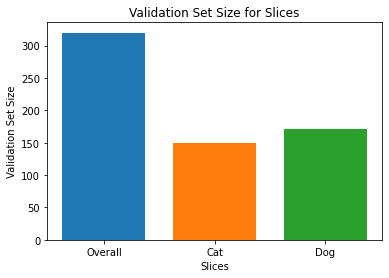

In [ ]:
# Validation Set Size Bar Chart
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, len(examples['combined']['examples']), width, label='Overall')
rects1 = ax.bar(1, len(examples['cat']['examples']), width, label='Cat')
rects2 = ax.bar(2, len(examples['dog']['examples']), width, label='Dog')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'Cat', 'Dog'])
ax.set_ylabel('Validation Set Size')
ax.set_xlabel('Slices')
ax.set_title('Validation Set Size for Slices')

# Función integrada para cambiar el formato de imagenes
validation_set_size_barchart = figure_to_base64str(fig)

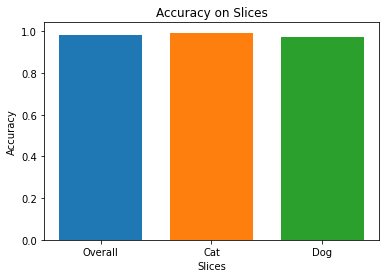

In [ ]:
# Acuracy Bar Chart
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, accuracy, width, label='Overall')
rects1 = ax.bar(1, cat_accuracy, width, label='Cat')
rects2 = ax.bar(2, dog_accuracy, width, label='Dog')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'Cat', 'Dog'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Slices')
ax.set_title('Accuracy on Slices')

# Función integrada para cambiar el formato de imagenes
accuracy_barchart = figure_to_base64str(fig)

Now we can add them to our `ModelCard`.

In [ ]:
# Agregar imagenes
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.collection = [
  mctlib.Graphic(name='Validation Set Size', image=validation_set_size_barchart),
]
model_card.quantitative_analysis.graphics.collection = [
  mctlib.Graphic(name='Accuracy', image=accuracy_barchart),
]

### Generate the Model Card
Let's generate the Model Card document. Available formats are stored at [model_card_toolkit/template](https://github.com/tensorflow/model-card-toolkit/tree/master/model_card_toolkit/template). Here, we will demonstrate the HTML and Markdown formats.

First, we need to update the `ModelCardToolkit` with the latest `ModelCard`.

In [ ]:
mct.update_model_card(model_card)

Now, the `ModelCardToolkit` can generate a Model Card document with `ModelCardToolkit.export_format()`.

Name,Value
accuracy,"0.981249988079071 (None, None)"
"accuracy, cat","0.9932885766029358 (None, None)"
"accuracy, Dog","0.9707602262496948 (None, None)"

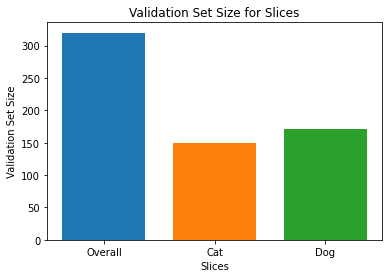
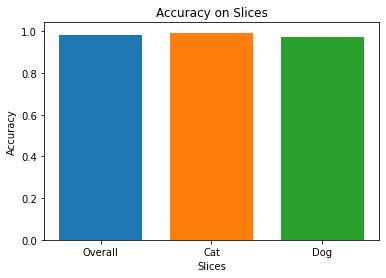

In [ ]:
# Generate a model card document in HTML (default)
html_doc = mct.export_format()

# Display the model card document in HTML
display.display(display.HTML(html_doc))

You can also output a Model Card in other formats, like Markdown.







# Model Card for Fine-tuned MobileNetV2 Model for Cats vs. Dogs

## Model Details

### Overview
This model distinguishes cat and dog images. It uses the MobileNetV2 architecture (https://arxiv.org/abs/1801.04381) and is trained on the Cats vs Dogs dataset (https://www.tensorflow.org/datasets/catalog/cats_vs_dogs). This model performed with high accuracy on both Cat and Dog images. 

### Version

name: v1.0  

date: 08/28/2020  

### Owners

* Model Cards Team, model-cards@google.com


### Licenses

* Apache-2.0

### References

* [https://www.tensorflow.org/guide/keras/transfer_learning](https://www.tensorflow.org/guide/keras/transfer_learning)
* [https://arxiv.org/abs/1801.04381](https://arxiv.org/abs/1801.04381)


### Citations

* https://github.com/tensorflow/model-card-toolkit/blob/ master/model_card_toolkit/documentation/examples/ Standalone_Model_Card_Toolkit_Demo.ipynb



## Considerations

### Use Cases

* This model classifies images of cats and dogs.


### Limitations

* This model is not able to classify images of other classes.


### Ethical Considerations

* Risk: While distinguishing between cats and dogs is generally agreed to be a benign application of machine learning, harmful results can occur when the model attempts to classify images that don’t contain cats or dogs.
  * Mitigation Strategy: Avoid application on non-dog and non-cat images.

## Graphics
  
### Validation Set Size
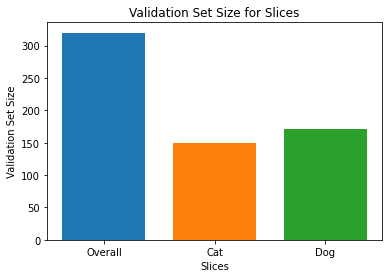


  
### Accuracy
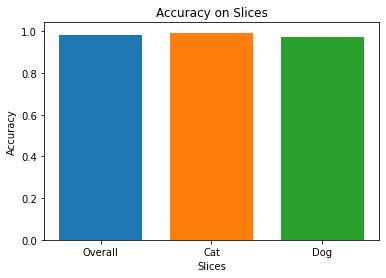


## Metrics

|Name|Value|
-----|------
|accuracy|0.981249988079071 (None, None)|
|accuracy, cat|0.9932885766029358 (None, None)|
|accuracy, Dog|0.9707602262496948 (None, None)|



In [ ]:
# Generate a model card document in Markdown
md_path = os.path.join(model_card_dir, 'template/md/default_template.md.jinja')
md_doc = mct.export_format(template_path=md_path, output_file='model_card.md')

# Display the model card document in Markdown
display.display(display.Markdown(md_doc))